In [ ]:

import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from optuna.visualization import plot_param_importances, plot_parallel_coordinate
from models.utils.common import get_project_root, parse_params
import joblib

In [102]:
# Load results
experiment_name = "v2_run"
results_dir = os.path.join(get_project_root(), "results", experiment_name)
results = pd.read_csv(os.path.join(results_dir, "optuna_results.csv"))
selected_models = pd.read_csv(os.path.join(results_dir, "selected_models.csv"))

In [115]:
selected_models

,model,mean_test_accuracy,mean_test_precision,mean_test_recall,mean_test_f1,mean_train_accuracy,mean_train_precision,mean_train_recall,mean_train_f1,overfit,overfit_flg,n_estimators,learning_rate,max_depth,subsample,gamma,robust_f1
0,XGBoost,0.874596,0.784512,0.656114,0.714581,0.880574,0.798736,0.669633,0.728494,0.013913,False,NaN,0.271882,3,0.604880,4.0,0.710408
1,XGBoost,0.874596,0.784512,0.656114,0.714581,0.880574,0.798736,0.669633,0.728494,0.013913,False,NaN,0.277496,4,0.606491,4.0,0.710408
2,GradientBoosting,0.873654,0.787399,0.646531,0.710039,0.881629,0.807496,0.663473,0.728420,0.018381,False,197.0,0.155051,3,0.764411,NaN,0.704524


In [103]:
# Parse params for readability
# Convert stringified dicts to real dicts
results["params"] = results["params"].apply(parse_params)
# Parse params for readability 
params_df = pd.json_normalize(results["params"])
results = pd.concat([results.drop(columns="params"), params_df], axis=1)
results

,model,mean_test_accuracy,mean_test_precision,mean_test_recall,mean_test_f1,mean_train_accuracy,mean_train_precision,mean_train_recall,mean_train_f1,overfit,overfit_flg,n_estimators,learning_rate,max_depth,subsample,gamma
0,GradientBoosting,0.873101,0.784864,0.646959,0.709256,0.884434,0.811671,0.673227,0.735994,0.026739,False,106.0,0.163239,3,0.869457,NaN
1,GradientBoosting,0.873101,0.784864,0.646959,0.709256,0.884434,0.811671,0.673227,0.735994,0.026739,False,195.0,0.197239,4,0.724272,NaN
2,GradientBoosting,0.873101,0.784864,0.646959,0.709256,0.884434,0.811671,0.673227,0.735994,0.026739,False,122.0,0.102712,4,0.730156,NaN
3,GradientBoosting,0.873101,0.784864,0.646959,0.709256,0.884434,0.811671,0.673227,0.735994,0.026739,False,127.0,0.145815,3,0.867203,NaN
4,GradientBoosting,0.873101,0.784864,0.646959,0.709256,0.884434,0.811671,0.673227,0.735994,0.026739,False,166.0,0.144827,5,0.647610,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,XGBoost,0.871791,0.782365,0.643023,0.705875,0.877483,0.797404,0.654189,0.718722,0.012848,False,NaN,0.271236,3,0.659007,4.0
66,XGBoost,0.872384,0.784340,0.643622,0.707043,0.876960,0.795474,0.653932,0.717774,0.010731,False,NaN,0.269829,3,0.658518,4.0
67,XGBoost,0.872589,0.784585,0.644477,0.707643,0.877216,0.797546,0.652478,0.717744,0.010101,False,NaN,0.268570,3,0.657915,4.0
68,XGBoost,0.871647,0.782515,0.641996,0.705319,0.877145,0.796758,0.653205,0.717867,0.012548,False,NaN,0.267068,3,0.648423,4.0


In [104]:
non_overfitted = results[
    (results["overfit"] < 0.05) &
    (results["model"] != "RandomForest")
].copy()
non_overfitted["robust_f1"] = non_overfitted["mean_test_f1"] - 0.5 * non_overfitted["overfit"]

In [105]:
xgboost_trials = non_overfitted[non_overfitted["model"] == "XGBoost"]
len(xgboost_trials)

35

In [106]:
gb_trials = non_overfitted[non_overfitted["model"] == "GradientBoosting"]
len(gb_trials)

31

# Hyperparameter Analysis With Study Files


## XGBoost Analysis

In [107]:
# Load Optuna studies
xgboost_study = joblib.load(os.path.join(results_dir, "XGBoost_study.pkl"))
gb_study = joblib.load(os.path.join(results_dir, "GradientBoosting_study.pkl"))

In [108]:
importances = optuna.importance.get_param_importances(xgboost_study)
importances_df = pd.DataFrame(importances.items(), columns=['Parameter', 'Importance'])
importances_df

,Parameter,Importance
0,subsample,0.515195
1,max_depth,0.254049
2,learning_rate,0.210339
3,gamma,0.020417


/var/folders/ck/3wk2w5cd3bl5y_jxgxymllsr0000gp/T/ipykernel_24318/3877365219.py:2: ExperimentalWarning: optuna.visualization.matplotlib._param_importances.plot_param_importances is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_param_importances(xgboost_study)


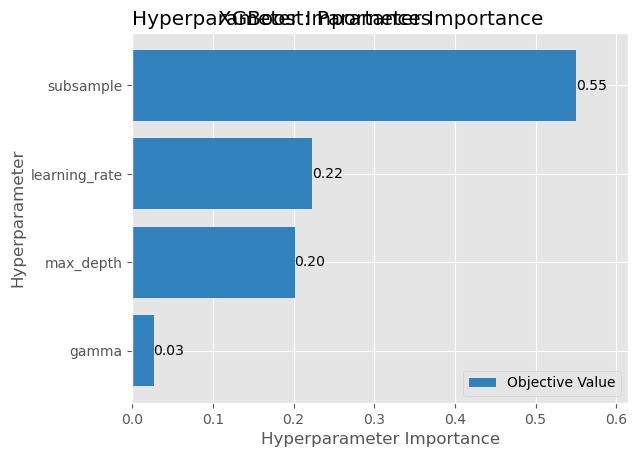

In [109]:
# Parameter importance (XGBoost)
optuna.visualization.matplotlib.plot_param_importances(xgboost_study)
plt.title("XGBoost: Parameter Importance")
plt.savefig(os.path.join(results_dir, "xgboost_param_importance.png"), bbox_inches="tight")
plt.show()

#### Optimization History (`plot_optimization_history`)
- **Purpose**: Visualizes how `robust_f1` improves over trials for each model (XGBoost, GradientBoosting).
- **Insight**: 
  - Plateau in `robust_f1` suggests current `optuna_trials` (e.g., 20) is sufficient.
  - Continued improvement indicates increasing `optuna_trials` (e.g., to 50) for better optimization.
- **Use Case**: Decide if more trials are needed in `config_v2.yaml`.

/var/folders/ck/3wk2w5cd3bl5y_jxgxymllsr0000gp/T/ipykernel_24318/1183356257.py:1: ExperimentalWarning: optuna.visualization.matplotlib._optimization_history.plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_optimization_history(xgboost_study)


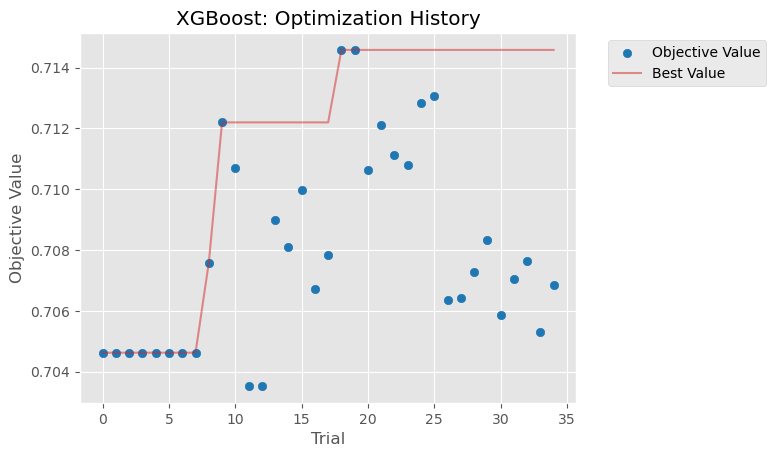

In [110]:
optuna.visualization.matplotlib.plot_optimization_history(xgboost_study)
plt.title("XGBoost: Optimization History")
plt.savefig(os.path.join(results_dir, "xgboost_optimization_history.png"), bbox_inches="tight")
plt.show()


#### Parallel Coordinate Plot (`plot_parallel_coordinate`)
- **Purpose**: Shows interactions between all hyperparameters and `robust_f1`.
- **Insight**: 
  - Identifies combinations (e.g., low `max_depth`, high `gamma`) yielding high `robust_f1`.
  - Confirms parameter ranges for refinement (e.g., `max_depth: 3–5` if high `robust_f1` lines cluster).
- **Use Case**: Refine parameter ranges in `config_v2.yaml` based on optimal combinations.

/var/folders/ck/3wk2w5cd3bl5y_jxgxymllsr0000gp/T/ipykernel_24318/1175003437.py:1: ExperimentalWarning: optuna.visualization.matplotlib._parallel_coordinate.plot_parallel_coordinate is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_parallel_coordinate(xgboost_study)


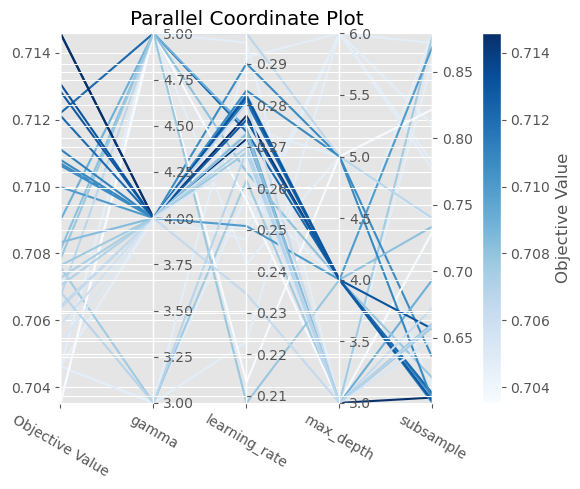

In [111]:
optuna.visualization.matplotlib.plot_parallel_coordinate(xgboost_study)
plt.savefig(os.path.join(results_dir, "xgboost_parallel_coordinate.png"), bbox_inches="tight")
plt.show()

#### Contour Plot (`plot_contour`)
- **Purpose**: Visualizes pairwise parameter interactions (e.g., `max_depth` vs. `learning_rate`) and their effect on `robust_f1`.
- **Insight**: 
  - Highlights regions with high `robust_f1` (e.g., `max_depth: 3–5`, `learning_rate: 0.15–0.3`).
  - Confirms scatterplot trends and identifies trade-offs.
- **Use Case**: Narrow specific parameter pairs for `config_v2.yaml`.

/var/folders/ck/3wk2w5cd3bl5y_jxgxymllsr0000gp/T/ipykernel_24318/4164347682.py:2: ExperimentalWarning: optuna.visualization.matplotlib._contour.plot_contour is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_contour(xgboost_study, params=["gamma", "learning_rate"])


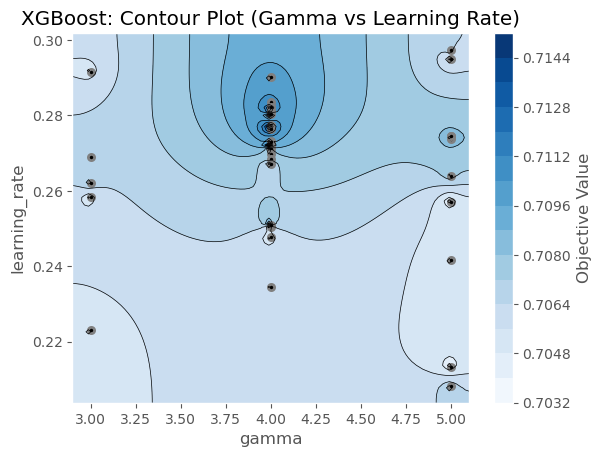

In [112]:
# Contour Plot: gamma vs learning_rate (XGBoost)
optuna.visualization.matplotlib.plot_contour(xgboost_study, params=["gamma", "learning_rate"])
plt.title("XGBoost: Contour Plot (Gamma vs Learning Rate)")
plt.savefig(os.path.join(results_dir, "xgboost_contour_gamma_learning_rate.png"), bbox_inches="tight")
plt.show()


/var/folders/ck/3wk2w5cd3bl5y_jxgxymllsr0000gp/T/ipykernel_24318/738283722.py:1: ExperimentalWarning: optuna.visualization.matplotlib._contour.plot_contour is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_contour(xgboost_study, params=["max_depth", "learning_rate"])


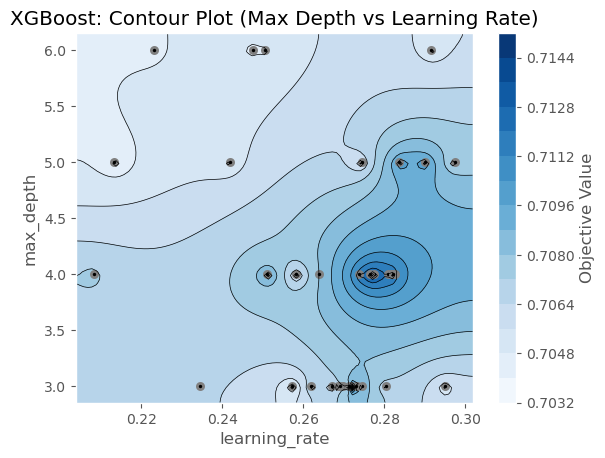

In [113]:
optuna.visualization.matplotlib.plot_contour(xgboost_study, params=["max_depth", "learning_rate"])
plt.title("XGBoost: Contour Plot (Max Depth vs Learning Rate)")
plt.savefig(os.path.join(results_dir, "xgboost_contour_max_depth_learning_rate.png"), bbox_inches="tight")
plt.show()

#### Best Trial Details
- **Purpose**: Extracts the best trial’s parameters and `robust_f1` from the study.
- **Insight**: 
  - Validates `selected_models` parameters (e.g., XGBoost `max_depth = 5`).
  - Ensures consistency between study and `optuna_results.csv`.
- **Use Case**: Confirm top model parameters for refinement.

In [99]:
print("XGBoost Best Trial:", xgboost_study.best_trial.params, xgboost_study.best_trial.value)
print("GradientBoosting Best Trial:", gb_study.best_trial.params, gb_study.best_trial.value)

XGBoost Best Trial: {'max_depth': 6, 'learning_rate': 0.23841313541803472, 'subsample': 0.8669383033477509, 'gamma': 3} 0.7129850808548966
GradientBoosting Best Trial: {'n_estimators': 164, 'learning_rate': 0.10706770924975373, 'max_depth': 5, 'subsample': 0.8644559550599825} 0.7135494902457583


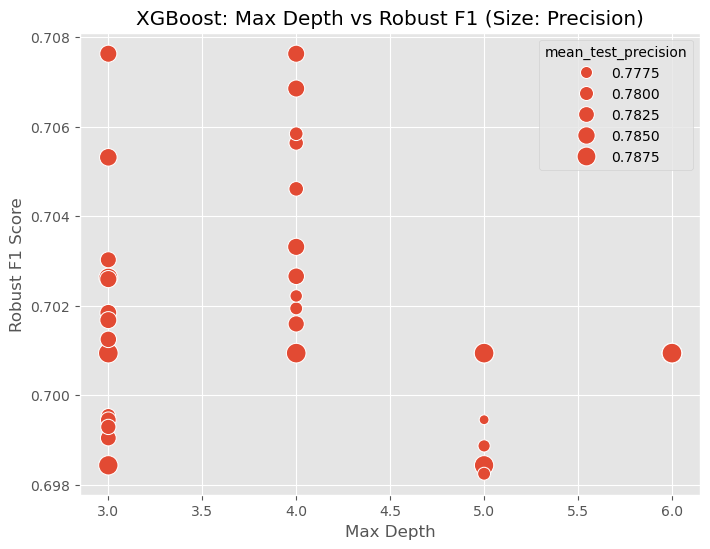

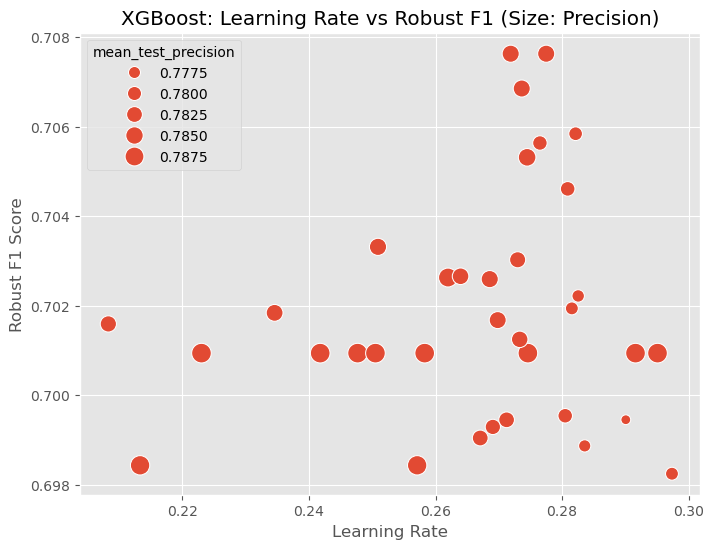

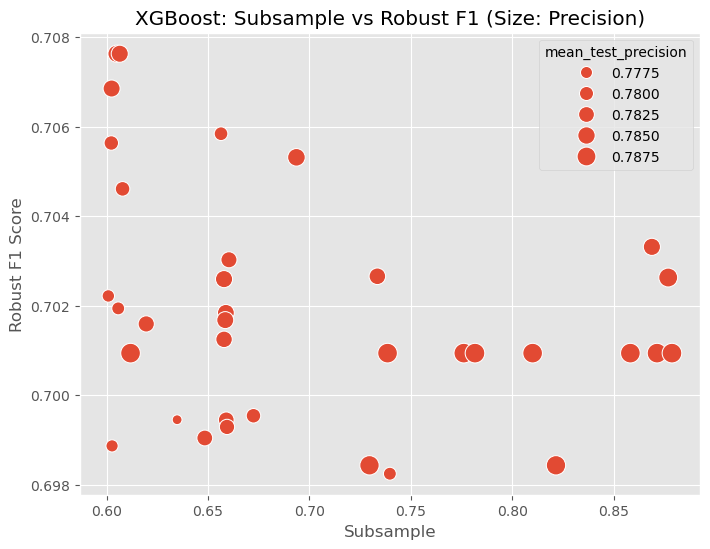

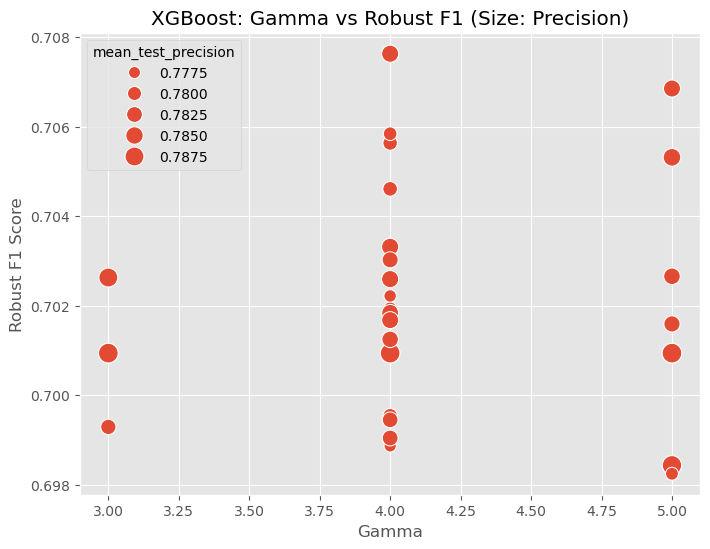

In [114]:
# Scatterplots for XGBoost
for param in ["max_depth", "learning_rate", "subsample", "gamma"]:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=param, y="robust_f1", size="mean_test_precision", sizes=(50, 200), data=xgboost_trials)
    plt.xlabel(param.replace("_", " ").title())
    plt.ylabel("Robust F1 Score")
    plt.title(f"XGBoost: {param.replace('_', ' ').title()} vs Robust F1 (Size: Precision)")
    plt.savefig(os.path.join(results_dir, f"xgboost_{param}_vs_robust_f1.png"), bbox_inches="tight")
    plt.show()

## CONCLUSIONS

- max depth: 5-6
- learning rate 0.2-0.3
- gamma 3-5
- subsample: 0.6-0.8

## Gradient Boosting Analysis

In [ ]:
# Parameter importance (GradientBoosting)
optuna.visualization.matplotlib.plot_param_importances(gb_study)
plt.savefig(os.path.join(results_dir, "gb_param_importance.png"), bbox_inches="tight")
plt.show()

In [ ]:
importances = optuna.importance.get_param_importances(gb_study)
importances_df = pd.DataFrame(importances.items(), columns=['Parameter', 'Importance'])
importances_df

In [ ]:
# Scatterplots for GradientBoosting
for param in ["max_depth", "learning_rate", "subsample", "n_estimators"]:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=param, y="robust_f1", size="mean_test_precision", sizes=(50, 200), data=gb_trials)
    plt.xlabel(param.replace("_", " ").title())
    plt.ylabel("Robust F1 Score")
    plt.title(f"GradientBoosting: {param.replace('_', ' ').title()} vs Robust F1 (Size: Precision)")
    plt.savefig(os.path.join(results_dir, f"gb_{param}_vs_robust_f1.png"), bbox_inches="tight")
    plt.show()

# CONCLUSIONS
- Performance (robust_f1):XGBoost: Improved from 0.7057–0.7067 to 0.7104 (+0.004). Small but positive gain.
GradientBoosting: Improved from 0.7021 to 0.7045 (+0.0024). Modest improvement.
Conclusion: v2_refinement is better in terms of robust_f1 for both models.

- Precision (mean_test_precision):XGBoost: Stable (0.783–0.787 to 0.7845). Still meets marketing goal (>0.78 for low false positives).
GradientBoosting: Improved from 0.7819 to 0.7874 (+0.0055). Better for marketing.
Conclusion: v2_refinement is better for GradientBoosting precision, similar for XGBoost.

- Overfit:XGBoost: Reduced from 0.0187–0.0195 to 0.0139 (-0.005). Significant improvement.
GradientBoosting: Reduced from 0.0319 to 0.0184 (-0.0135). Notable improvement.
Conclusion: v2_refinement is much better, with lower overfitting for both models. XGBoost’s lower overfit (0.0139 vs. 0.0184) confirms your observation that it’s less overfitted than GradientBoosting.


v2_refinement is better due to higher robust_f1, maintained or improved mean_test_precision, and significantly reduced overfit, making models more generalizable

